In [2]:

import pandas as pd

med_data = pd.read_csv('Med_revised.csv')

mean_yearcollected = med_data['yearcollected'].mean()

# Impute missing values in the 'yearcollected' column with the mean value
med_data['yearcollected'].fillna(mean_yearcollected, inplace=True)
med_data['yearcollected'] = med_data['yearcollected'].astype(int)
med_data.to_csv('Med_revised_imputed.csv', index=False)

In [3]:
file_names = ['Med_revised_imputed.csv', 'Baltic_revised.csv', 'Black_revised.csv']

combined_data = pd.DataFrame()


for file_name in file_names:
    df = pd.read_csv(file_name, usecols=['seasoncollected', 'yearcollected', 'waterbody', 'phylum', 'scientificname'])
    combined_data = pd.concat([combined_data, df])
    
combined_data.reset_index(drop=True, inplace=True)
combined_data.to_csv('EU_region.csv', index=False)

In [4]:
eu_region_data = pd.read_csv('EU_region.csv')
#eu_region_data.head()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

eu_region_data = pd.read_csv('EU_region.csv')

# Filter the data for the specified phyla and the Baltic Sea region
selected_phyla = ['Arthropoda', 'Mollusca', 'Annelida']
baltic_sea_data = eu_region_data[(eu_region_data['phylum'].isin(selected_phyla)) & (eu_region_data['waterbody'] == 'Baltic Sea')]

# Group the filtered data by year and phylum and count occurrences
grouped_data = baltic_sea_data.groupby(['yearcollected', 'phylum']).size().unstack(fill_value=0)


#grouped_data.plot(kind='line', marker='o', figsize=(10, 6))
#plt.title('Phylum Distribution in the Baltic Sea Over the Years')
#plt.xlabel('Year Collected')
#plt.ylabel('Count')
#plt.legend(title='Phylum', loc='upper right')
#plt.grid(True)
#plt.show()


In [10]:
# Filter the data for the specified phyla and the Black Sea region
selected_phyla = ['Arthropoda', 'Mollusca', 'Annelida']
black_sea_data = eu_region_data[(eu_region_data['phylum'].isin(selected_phyla)) & (eu_region_data['waterbody'] == 'Black Sea')]

# Group the filtered data by year and phylum and count occurrences
grouped_data = black_sea_data.groupby(['yearcollected', 'phylum']).size().unstack(fill_value=0)


#grouped_data.plot(kind='bar', figsize=(10, 6))
#plt.title('Phylum Distribution in the Black Sea Over the Years')
#plt.xlabel('Year Collected')
#plt.ylabel('Count')
#plt.grid(True)
#plt.show()


In [9]:

eu_region_data = pd.read_csv('EU_region.csv')

# Filter the data for the specified phyla and the Baltic Sea region
selected_phyla = ['Arthropoda', 'Mollusca', 'Annelida']
baltic_sea_data = eu_region_data[(eu_region_data['phylum'].isin(selected_phyla)) & (eu_region_data['waterbody'] == 'Baltic Sea')]

# Group the filtered data by year and phylum and count occurrences
grouped_data = baltic_sea_data.groupby(['yearcollected', 'phylum']).size().unstack(fill_value=0)

#grouped_data.plot(kind='bar', figsize=(10, 6))
#plt.title('Phylum Distribution in the Baltic Sea Over the Years')
#plt.xlabel('Year Collected')
#plt.ylabel('Count')
#plt.grid(True)
#plt.show()


In [8]:


# Filter the data for 'Mollusca' in the 'Mediterranean sea'
mollusca_mediterranean = eu_region_data[(eu_region_data['phylum'] == 'Mollusca') & (eu_region_data['waterbody'] == 'Mediterranean sea')]

# Group the data by year and count occurrences
grouped_data = mollusca_mediterranean.groupby('yearcollected').size()

#grouped_data.plot(kind='bar', figsize=(10, 6))
#plt.title('Mollusca Distribution in the Mediterranean Sea Over the Years')
#plt.xlabel('Year Collected')
#plt.ylabel('Count')
#plt.grid(True)
#plt.show()


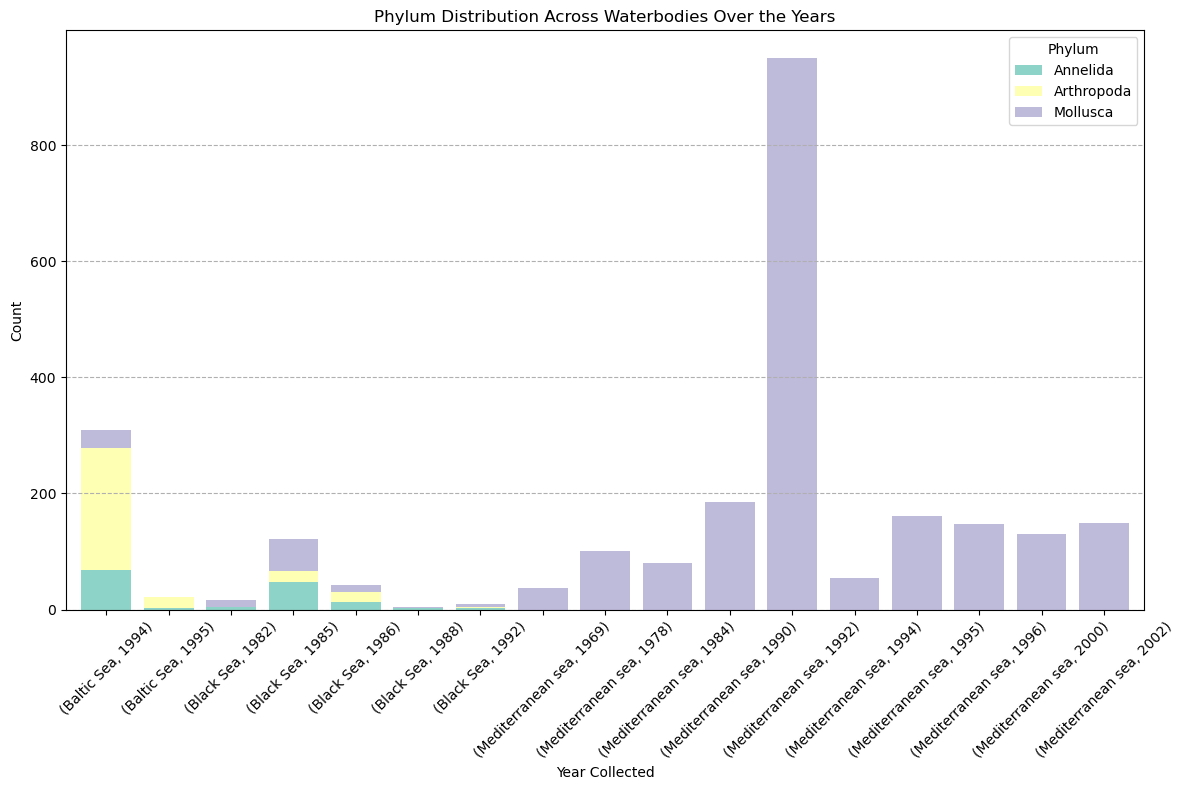

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


# Filter the data for the specified phyla and the three waterbodies
selected_phyla = ['Arthropoda', 'Mollusca', 'Annelida']
selected_waterbodies = ['Mediterranean sea', 'Baltic Sea', 'Black Sea']

# Filter the data based on selected phyla and waterbodies
filtered_data = eu_region_data[(eu_region_data['phylum'].isin(selected_phyla)) &
                              (eu_region_data['waterbody'].isin(selected_waterbodies))]


plt.figure(figsize=(12, 8))
sns.set_palette("Set3")  

# Group the filtered data by 'waterbody', 'yearcollected', and 'phylum' and count occurrences
grouped_data = filtered_data.groupby(['waterbody', 'yearcollected', 'phylum']).size().unstack(fill_value=0)


grouped_data.plot(kind='bar', stacked=True, width=0.8, ax=plt.gca())


plt.title('Phylum Distribution Across Waterbodies Over the Years')
plt.xlabel('Year Collected')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Phylum', loc='upper right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig("phylum_over_waterbodies.pdf", format="pdf")
plt.show()


In [7]:

selected_phyla = ['Arthropoda', 'Mollusca', 'Annelida']

# Group the filtered data by 'yearcollected' and 'phylum' and count occurrences
grouped_data = eu_region_data[eu_region_data['phylum'].isin(selected_phyla)]\
    .groupby(['yearcollected', 'phylum']).size().unstack(fill_value=0)


#ax = grouped_data.plot(kind='bar', figsize=(12, 6))


#plt.title('Phylum Count Over the Years')
#plt.xlabel('Year Collected')
#plt.ylabel('Count')
#plt.grid(axis='y', linestyle='--')
#plt.legend(title='Phylum')
#plt.savefig("phylum_count_years_waterbodies.pdf", format="pdf")
#plt.show()


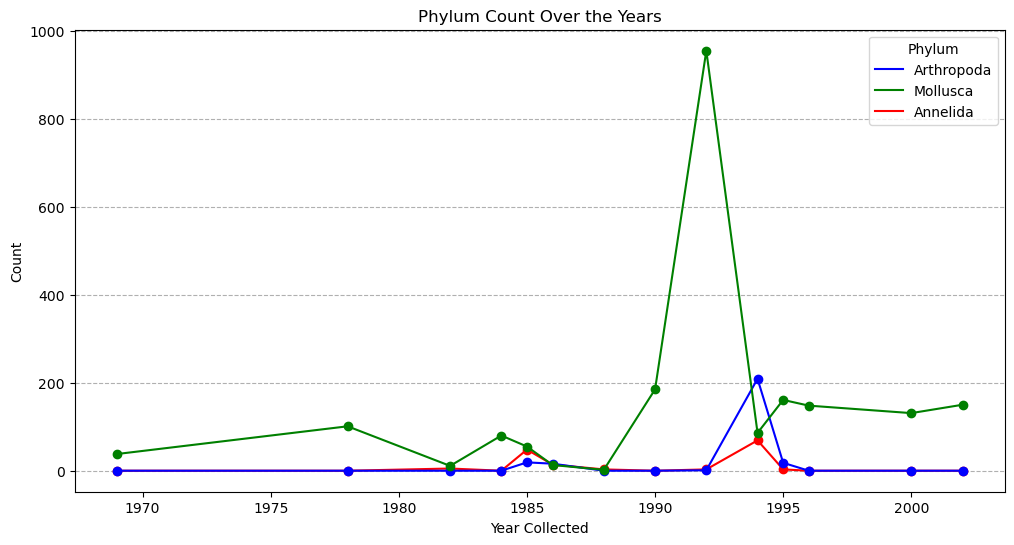

In [59]:

selected_phyla = ['Arthropoda', 'Mollusca', 'Annelida']

# Group the filtered data by 'yearcollected' and 'phylum' and count occurrences
grouped_data = eu_region_data[eu_region_data['phylum'].isin(selected_phyla)] \
    .groupby(['yearcollected', 'phylum']).size().unstack(fill_value=0)

custom_palette = {
    'Arthropoda': 'blue',
    'Mollusca': 'green',
    'Annelida': 'red'
}

ax = grouped_data.plot(kind='line', figsize=(12, 6), marker='o', color=[custom_palette.get(phylum) for phylum in grouped_data.columns])

plt.title('Phylum Count Over the Years')
plt.xlabel('Year Collected')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')


custom_legend = [plt.Line2D([0], [0], color=custom_palette[phylum], label=phylum) for phylum in selected_phyla]
plt.legend(handles=custom_legend, title='Phylum')
plt.savefig("phylum_count_years_line_plot_1.pdf", format="pdf")
plt.show()

